# Módulo de Matemáticas 101: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica se centra en la regresión lineal (¡tema muy importante!) y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

## 1. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a un dataset concreto

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde $y$ es la variable a predecir y $X$ la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 1.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [3]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [4]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


En este punto, puedes hacer cualquier otro análisis exploratorio que creas conveniente.

A continuación, crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en millas por galón) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo, pero usa los parámetros que quieras en cuanto a color de los puntos, grids etc.

In [5]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
def visualiza(X, y, nombre_columna):
  Columna_estudio = X[nombre_columna]
  plt.figure(figsize=(10, 6))
  plt.scatter(Columna_estudio, y, color="red", alpha=0.5)
  plt.xlabel(nombre_columna)
  plt.ylabel("Consumo en millas por galón - mpg")

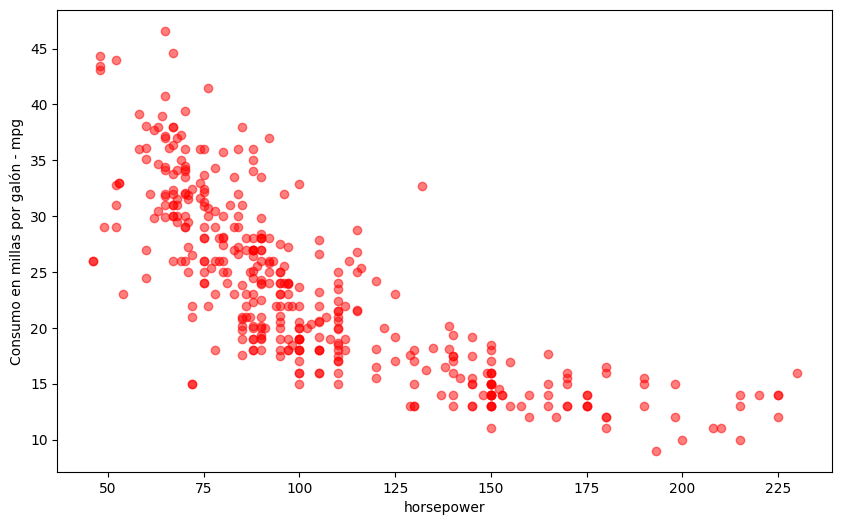

In [6]:
visualiza(X, y, 'horsepower')

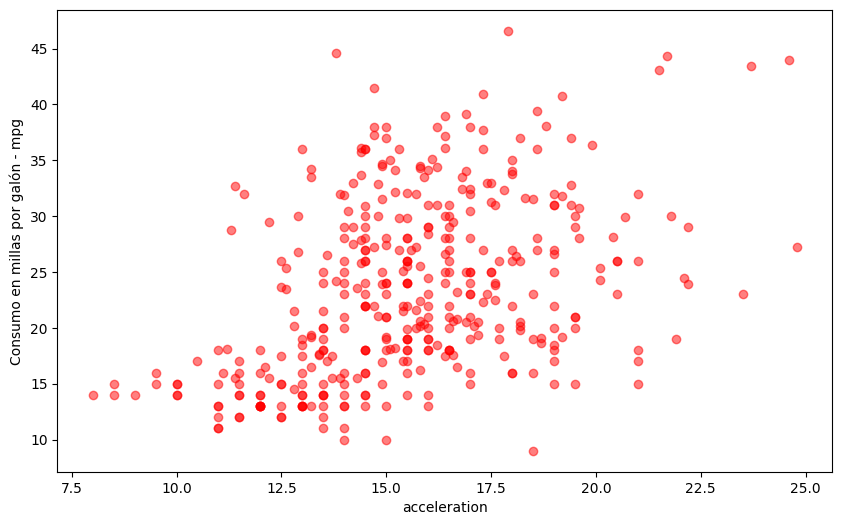

In [7]:
visualiza(X, y, 'acceleration')

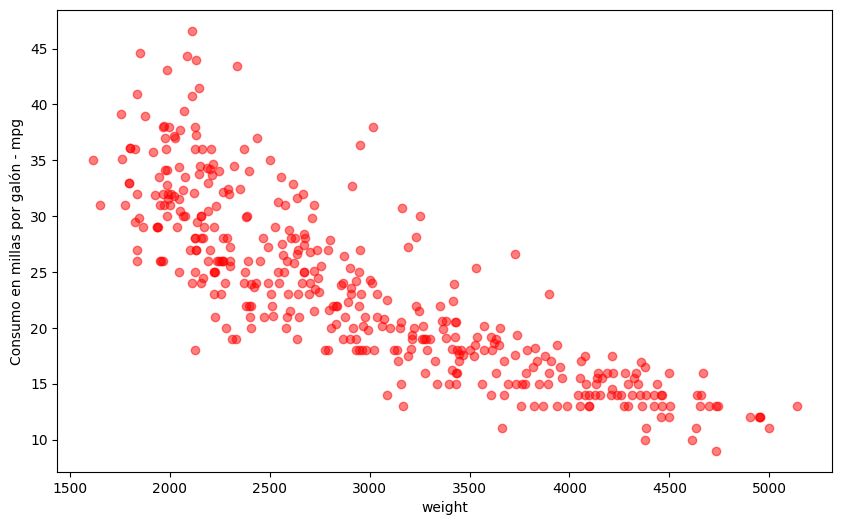

In [8]:
visualiza(X, y, 'weight')

IMPORTANTE: Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 1.2 Implementación del modelo

En este punto vamos a dar un paso atrás y olvidarnos de los datos de consumo por un momento, porque el algoritmo que vamos a implementar serviría para cualquier conjunto de datos.

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, lo mostramos por pantalla y salimos de la función. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [9]:
type(X)
type(y)

pandas.core.frame.DataFrame

In [10]:
from re import M
import numpy as np
def pesos_ols(X, y):
    # w = Xt_X_inv @ X_b.T @ y
    if X.shape[0] != y.shape[0]: #Ponemos la condición de que si el nº de filas de X, es distinto al de y, nos imprima un error y corte.
      print ("El número de filas de X debe ser idéntico al número de filas de y.")
      return None
    m = X.shape[0] #Calculamos las filas de m
    M_unos = np.ones((m, 1)) #Generamos una matriz de unos de dimensiones m filas con 1 columna
    X_b = np.hstack((M_unos, X)) #Añadimos horizontalmente la matriz anterior con X
    w = np.linalg.lstsq(X_b, y)[0] #Hacemos el cálculo por mínimos cuadrados (que me devuelva los coeficientes w0 e w1)
    return w

In [11]:
# Arrays de prueba!! No son dataset reales y no hace falta que los dibujemos
X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077],
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
print(y_prueba.shape[0])
print(X_prueba.shape[0])
pesos_ols(X_prueba, y_prueba)

10
2
El número de filas de X debe ser idéntico al número de filas de y.


In [12]:
X_prueba = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077],
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]]).reshape(10,2)
y_prueba = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
print(y_prueba.shape[0])
print(X_prueba.shape[0])
pesos_ols(X_prueba, y_prueba)

10
10


array([ 1.98968523e+05,  7.36278026e+01, -8.63759760e+01])

Hasta aquí hemos implementado el algoritmo de mínimos cuadrados y lo hemos probado en un array de tamaño 2x10, pero aún no lo hemos probado con ningún dataset real.

### 1.3 Prueba del modelo en los datos de consumo de coches

Ahora sí, ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado, el de consumo de combustible. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

In [13]:
#Aquí he estado probando formas de darle formato array de numpy a los dataframes de Pandas
columna_peso = np.array(X["weight"])
columna_peso
columna_peso2 = X["weight"].to_numpy()
columna_peso2
columna_peso2 == columna_peso
print(y)
print(columna_peso)
print(columna_peso.reshape(-1,1))

      mpg
0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
..    ...
393  27.0
394  44.0
395  32.0
396  28.0
397  31.0

[398 rows x 1 columns]
[3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 3563 3609 3761 3086
 2372 2833 2774 2587 2130 1835 2672 2430 2375 2234 2648 4615 4376 4382
 4732 2130 2264 2228 2046 2634 3439 3329 3302 3288 4209 4464 4154 4096
 4955 4746 5140 2962 2408 3282 3139 2220 2123 2074 2065 1773 1613 1834
 1955 2278 2126 2254 2408 2226 4274 4385 4135 4129 3672 4633 4502 4456
 4422 2330 3892 4098 4294 4077 2933 2511 2979 2189 2395 2288 2506 2164
 2100 4100 3672 3988 4042 3777 4952 4464 4363 4237 4735 4951 3821 3121
 3278 2945 3021 2904 1950 4997 4906 4654 4499 2789 2279 2401 2379 2124
 2310 2472 2265 4082 4278 1867 2158 2582 2868 3399 2660 2807 3664 3102
 2875 2901 3336 1950 2451 1836 2542 3781 3632 3613 4141 4699 4457 4638
 4257 2219 1963 2300 1649 2003 2125 2108 2246 2489 2391 2000 3264 3459
 3432 3158 4668 4440 4498 4657 3907 3897 3730 3785 3039 3221 3169 2171
 263

array([[ 4.63173644e+01],
       [-7.67661006e-03]])

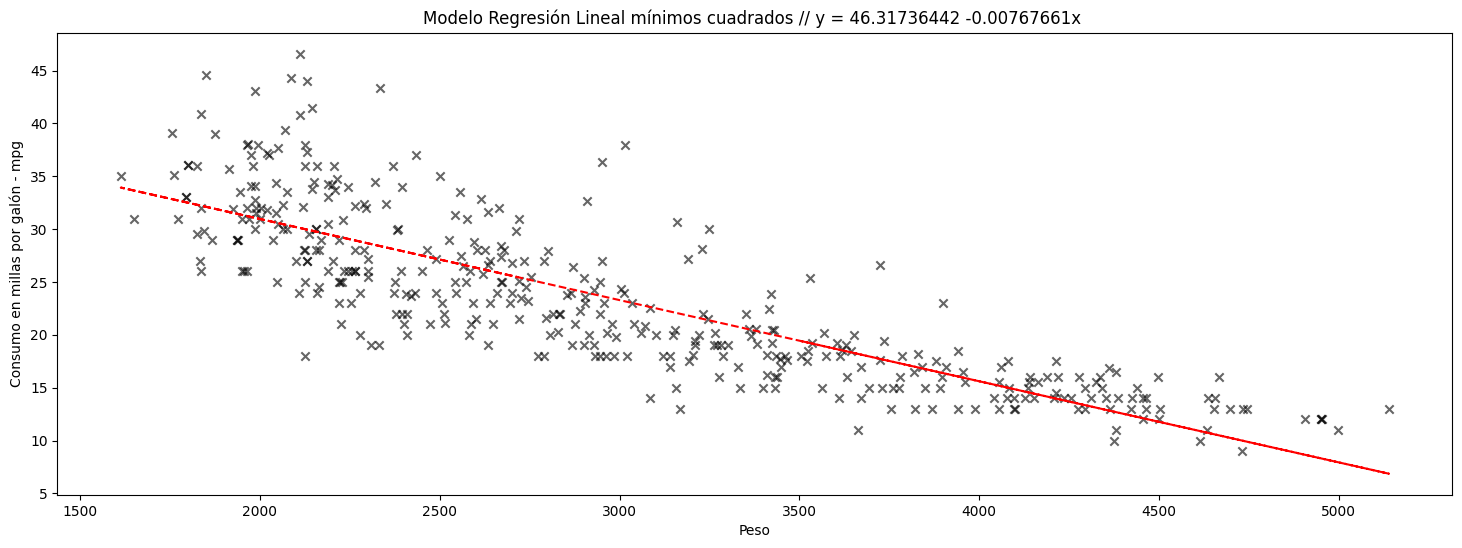

In [15]:
# COMO AHORA VAMOS A TRABAJAR CON LOS DATOS ORIGINALES (Pandas-Excel),necesitamos convertir los datos
# a numpy para poder hacer todo el cálculo matricial.
columna_peso3 = columna_peso.reshape(-1, 1) ## El -1 significa que a todas las filas, las deja en una misma columna.
y_ok = y.to_numpy()
w2 = pesos_ols(columna_peso3, y_ok)
intercept = w2[0]
pendiente = w2[1]
y_prediccion = intercept + pendiente * columna_peso3
#Aproveché y estuve mirando las diferentes gráficas y formas que se le podía dar.
plt.figure(figsize=(18, 6))
plt.scatter(columna_peso3, y_ok, color = "black", marker="x", alpha=0.6)
plt.plot (columna_peso3, y_prediccion, ls = "--", color = "red")
plt.title("Modelo Regresión Lineal mínimos cuadrados // y = 46.31736442 -0.00767661x ")
plt.xlabel("Peso")
plt.ylabel("Consumo en millas por galón - mpg")
w2

Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [16]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features
y = auto_mpg.data.targets

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn (solo hay que ver si coincide o no para saber si te has equivocado en algún punto). Si coincide, ¡enhorabuena! Ya sabes implementar tu primer modelo de Machine Learning desde la base.

### 1.4 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



Es mucho más rápido computacionalmente hablando, la utilización del método del desceso del gradiente pero, tiene el riesgo de que no siempre converge.


## 2. Optimización con descenso del gradiente

Vamos a resolver el mismo problema usando el descenso del gradiente en lugar de la solución analítica. El descenso del gradiente es un método de optimización iterativo que usa el operador gradiente.

Como es iterativo, necesitamos decirle cuándo tiene que parar y darnos la solución. En este caso, le vamos a decir que pare y nos devuelva la solución después de un número de iteraciones que le pasaremos como parámetro. La ecuación iterativa es.

$$w^{t+1} = w^t - \eta \cdot \nabla f(w)$$

donde f es nuestra función objetivo, y w es un vector. Para la función objetivo, vamos a usar el error RSS, que querremos minimizar.

$$ RSS(w) = \frac{1}{2}\sum_{n=1}^{N}[y_n-f(x_n)]^2$$

y cuyo gradiente es:

$$\nabla RSS(w) = X^T(Xw^t-y)$$

TIP: Ten en cuenta que el RSS también lo puedes escribir como $\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

### 2.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

## FÓRMULAS A TENER EN CUENTA

Podemos calcular el gradiente y nos queda:

A.$$\nabla RSS(w) = X^T(Xw^t-y)$$

En resumen, el gradient descendiente para una regresión lineal, se basa en resolver esta ecuación de forma iterativa:

B.$$\vec w^{(t+1)} = \vec w^{(t)} - \eta \cdot \nabla RSS(\vec w)$$

Ten en cuenta que el RSS también lo puedes escribir como

C.

$\frac{1}{2}\sum_{n=1}^{N}[y_n-\hat{y_n}]^2$ donde $\hat{y_n} = X \hat{w}$ en cada paso.

Representación gráfica: https://developers.google.com/machine-learning/crash-course/linear-regression/gradient-descent-exercise

In [21]:
y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

In [20]:
import numpy as np
def gradient_descent(X, y, w0, n_iter, eta):

  # X - son los datos de entrada,
  # y - lo que quiero predecir,
  # w0 - peso inicial,
  # n_iter - número de iteraciones
  # eta - learning rate

    m = X.shape[0]
    X_b = np.hstack([np.ones((m, 1)), X])
    #Agregamos la columna de unos para poder hacer las operaciones correctamente

    w = w0
    loss_iter = [np.inf]
    #Guardamos los historiales de los errores.
    w_iter = [w0]
    #Guardamos los historiales de los pesos.

    for i in range(n_iter):
        y_pred = X_b @ w #Mi y predicha, utilizo fórmula C
        Dif = y - y_pred  #Calculo la diferencia y - la predicha
        rss = 0.5 * np.sum(Dif**2) #Calculo el RSS, utilizo fórmula C
        loss_iter.append(rss) #Añado el RSS a loss_iter
        gradiente = X_b.T @ (y_pred - y) #Utilizo la fórmula A
        w = w - eta * gradiente #Utilizo la fórmula B
        w_iter.append(w) #Añado el valor de w a mi w_iter

    #Hago que me devuelva dos np.arrays con lo almacenado en loss_iter
    #que serán mis RSS y mis w_iter.
    return np.array(w_iter), np.array(loss_iter)

eta = 0.01
iteraciones = 2000
np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))
X_norm_ej = (X - X.mean()) / X.std()
y_norm_ej = (y - y.mean()) / y.std()
weights, loss = gradient_descent(X_norm_ej, y_norm_ej, w0, iteraciones, eta)
weights, loss


(array([[[ 6.96469186e-01],
         [ 2.86139335e-01]],
 
        [[ 6.61645726e-01],
         [ 3.02238865e-01]],
 
        [[ 6.28563440e-01],
         [ 3.17533419e-01]],
 
        ...,
 
        [[-5.55304518e-17],
         [ 6.08129945e-01]],
 
        [[-5.44202287e-17],
         [ 6.08129945e-01]],
 
        [[-5.55304518e-17],
         [ 6.08129945e-01]]]),
 array([       inf, 3.04731312, 2.90380597, ..., 1.57544492, 1.57544492,
        1.57544492]))

### 2.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [19]:
print(X_np.shape)
print(y_np.shape)
print(X_norm.shape)
print(y_norm.shape)

NameError: name 'X_np' is not defined

[[[ 0.37454012]
  [ 0.95071431]]

 [[ 0.46663745]
  [ 0.92108951]]

 [[ 0.55836823]
  [ 0.89158262]]

 ...

 [[23.51457286]
  [-6.49270202]]

 [[23.51457286]
  [-6.49270202]]

 [[23.51457286]
  [-6.49270202]]] [            inf 121319.65386703 120385.56173185 ...   3737.40700719
   3737.40700719   3737.40700719]


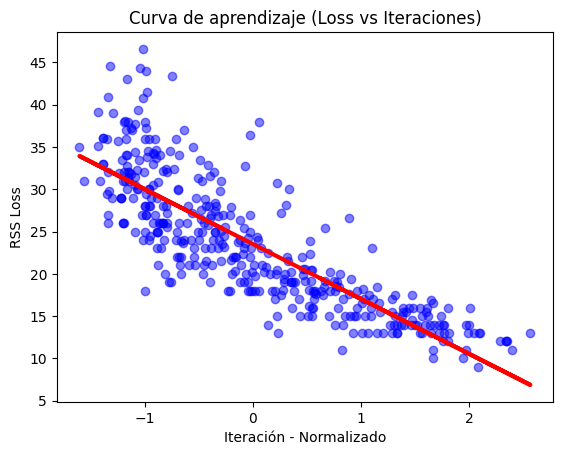

In [22]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

#Me salía todo el rato un problema de overflow, busqué para normalizar y solucionarlo.
X_norm = (X_np - X_np.mean()) / X_np.std()
y_norm = y_np

eta = 0.00001
iteraciones = 7000
np.random.seed(42)
w0 = np.random.rand(2, 1)
weights2, loss2 = gradient_descent(X_norm, y_norm, w0, iteraciones, eta)
x_max = np.max(X_norm) + 1
x_min = np.min(X_norm) -1

w_final = weights2[-1]
y_recta = w_final[0] + (w_final[1] * X_norm)
print(weights2, loss2)

plt.scatter(X_norm, y_norm, color='blue', alpha=0.5, label='Datos Reales')
plt.plot(X_norm, y_recta, color='red', linewidth=3, label='Nuestra Predicción')
plt.title('Curva de aprendizaje (Loss vs Iteraciones)')
plt.xlabel('Iteración - Normalizado')
plt.ylabel('RSS Loss')
plt.show()
